Problema de clasificación,en el que se emplea el algoritmo knn, y se ve como de bien funciona el modelo calculando el accuracy y posteriormente creando una matriz de confusión para ver donde estuvieron los errores.
Curva ROC,como evaluación.

In [1]:
import pandas as pd

#Cargamos los datos ómicos de la matriz de expresión desde un fichero compartido en Google Drive
gene_exp_inmune = pd.read_csv('https://drive.google.com/uc?id=1PYzEIdmnfjOnBpPDIFBE9hL1Lkj_OBCk',index_col=0)
#Cargamos la variable clínica correspondiente a las etiquetas "inmune" vs. "MITF-low"
clinical_info_inmune = pd.read_csv('https://drive.google.com/uc?id=1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s',index_col=0)

X, y = gene_exp_inmune, clinical_info_inmune

#Imprimimos las 5 primeras muestras del conjunto de datos
X.head()

,COL2A1,RXRG,CCL19,SSX1,CST2,PRSS33,CDH2,SCUBE2,TMPRSS13,TRPM8,...,UBASH3A,GBP4,PRF1,PTK6,PCDHB2,GSDMA,DIO2,PLIN1,NCF1C,SLC7A11
0,-1.431141,-7.845756,0.665118,-1.409304,-2.537396,-1.676281,1.529957,-0.895042,-0.298778,5.091742,...,-0.659997,-1.469602,-0.570793,1.047635,-2.068966,-0.202828,-0.506767,1.285256,-0.901222,2.483020
1,-0.424374,-8.352423,0.386055,-2.846138,-0.685105,0.339787,-3.488043,-0.584982,5.679815,-1.117879,...,0.190202,-0.282190,0.375094,0.261662,3.356282,2.028145,-2.399010,-1.152801,0.662490,-2.914991
2,11.014251,0.415549,-1.633781,0.315442,-0.662332,-0.498761,0.535811,-0.467456,-2.818738,1.731049,...,-0.816305,-0.316202,-1.153745,-2.284201,-1.761597,-0.746975,-2.988195,-1.976877,-1.400889,-2.266779
3,-1.180446,-8.187415,-1.958023,5.061146,-2.603744,-0.666706,0.456460,-4.609624,-1.713164,-3.880876,...,0.214344,-0.327110,0.476764,1.153275,-0.337649,-1.006765,-2.686648,-1.329148,0.055994,-2.652313
4,0.816312,-1.189303,4.837235,4.972176,-2.963715,-2.665721,-0.268042,-1.740607,0.011610,-4.107467,...,3.352734,2.145368,3.358865,-2.324389,-1.741669,0.734312,-1.649316,6.284688,1.450729,1.131275


In [2]:
#La orden "describe" muestra los principales estadísticos (solo 10 primeras variables). 
X[X.columns[0:10]].describe()

,COL2A1,RXRG,CCL19,SSX1,CST2,PRSS33,CDH2,SCUBE2,TMPRSS13,TRPM8
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.851833,-0.719944,1.136670,0.455719,0.562422,0.243546,0.173262,-0.144176,0.026026,0.435880
std,3.225967,3.171022,3.112834,3.059409,3.024017,2.848285,2.612762,2.617039,2.294357,2.740942
min,-2.453544,-9.460513,-6.670597,-3.316233,-2.963715,-3.826060,-6.937990,-6.293538,-4.181460,-4.974098
25%,-0.996501,-1.466714,-0.157164,-2.445496,-1.696510,-2.353053,-1.664596,-2.238180,-1.760676,-1.518327
50%,-0.366554,0.408615,1.615818,0.019864,-0.429073,0.293924,0.576447,0.039506,-0.320967,0.550273
75%,1.433984,1.352582,3.148308,2.615407,2.031879,2.039151,2.096088,1.905312,1.204806,2.181670
max,13.077674,3.452661,7.279227,8.045333,12.186303,9.439966,5.199115,5.527684,7.381040,7.094981


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Numero de instancias en entrenamiento: {}; y test: {}".format(len(X_train),len(X_test)))

Numero de instancias en entrenamiento: 252; y test: 84


In [4]:
from sklearn.neighbors import KNeighborsClassifier # cargamos la función desde la biblioteca
import warnings
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier() # instanciamos el modelo (parámetros por defecto)
knn.fit(X_train, y_train) # lo más importante: entrenamos el modelo 


KNeighborsClassifier()

In [5]:
y_pred = knn.predict(X_test) # predicción de cada etiqueta 

# imprimimos la etiqueta calculada para los 10 primeros datos de X_test
print(y_pred[:10]) 

['MITF-low' 'MITF-low' 'MITF-low' 'MITF-low' 'MITF-low' 'MITF-low'
 'MITF-low' 'MITF-low' 'MITF-low' 'MITF-low']


In [6]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.6428571428571429


In [7]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred)
print(m)

[[43  1]
 [29 11]]


In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y) #por defecto 5 particiones

print(scores) #los valores individuales de cada partición
print(np.mean(scores)) #la media de acierto global


[0.61764706 0.59701493 0.59701493 0.62686567 0.68656716]
0.6250219490781387


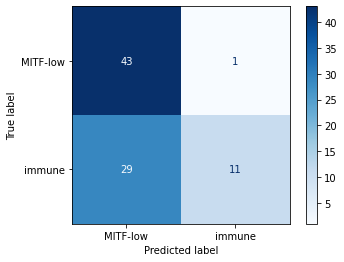

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt

#el parámetro cmap utilizar un mapa de color en azules para ser cómodo a la vista
metrics.plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)

El valor de AUC para kNN es 0.7664772727272727


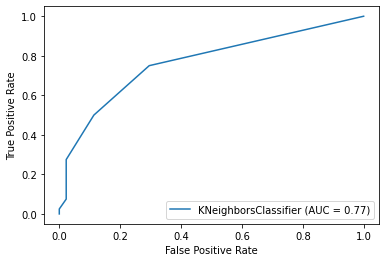

In [10]:
from sklearn import metrics

y_prob = knn.predict_proba(X_test)

auc_knn = metrics.roc_auc_score(y_test, y_prob[:,1]) 
print("El valor de AUC para kNN es", auc_knn)

metrics.plot_roc_curve(knn, X_test, y_test) #pintamos la curva